# Part II - (Presentation Title)
## by (your name here)

>**Before you start**: You must have the README.md file ready that include a summary of main findings that reflects on the steps taken during the data exploration (Part I notebook). The README.md file should also describes the key insights that will be conveyed by the explanatory slide deck (Part II  outcome)



## Investigation Overview


> Describe the overall goals of your presentation here. Add a summary of key insights at the start of the notebook, just as you added in the README.md. This will help your notebook to stay aligned to the key insights you want to include in your slide deck.

> **Rubric Tip**: The key insights in the slideshow must match those documented in the README.md summary. 


## Dataset Overview

> Provide a brief overview of the dataset to be presented here.

In [7]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from pathlib import Path
%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [8]:
# load in the dataset into a pandas dataframe
DATA_DIR = Path('data')
gobike_clean_path = DATA_DIR / 'gobike_cleaned.csv'
gobike_clean = pd.read_csv(gobike_clean_path)
gobike_clean.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,duration_min
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No,869.750000
1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No,708.683333
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No,1030.900000
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No,608.166667
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes,26.416667


> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## (Visualization 1)

> Write a comment about your visualization here. The visualization should be in the next cell, as a sub-slide type. Make sure your visualizations are polished!

> **Rubric Tip**: Provide at least 3 **polished** visualizations to convey key insights. The total number of visualizations in the slideshow shoould be less than 50% of the number of visualizations in the exploratory analysis. For example, if the exploratory analysis (Part I) has 18 visualizations, the slideshow can have (3 - 8) visualizations. 


> **Rubric Tip**: Each visualization in the slideshow is associated with **descriptive comments** that accurately depict their purpose and your observation. 


> **Rubric Tip**: All plots in the slideshow are appropriate, meaning the plot type, encodings, and transformations are suitable to the underlying data. 

> **Rubric Tip**: All plots in the slideshow are polished, meaning all plots have a title, labeled x/y axes (with units), x/y ticks, and legends. 

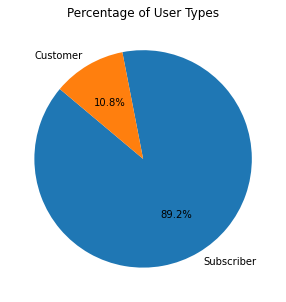

In [9]:
tot_user = gobike_clean.user_type.shape[0]

sub_user = gobike_clean.query('user_type == "Subscriber"').count()[12]/tot_user
cust_user = gobike_clean.query('user_type == "Customer"').count()[12]/tot_user

percentages = [sub_user*100, cust_user*100]
labels = ['Subscriber', 'Customer']

plt.figure(figsize=(8, 5))
plt.pie(percentages, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Percentage of User Types')
plt.show()

## (Visualization 2)

> You should have at least three visualizations in your presentation,
but feel free to add more if you'd like!

In [14]:
gobike_start_time = gobike_clean.set_index(pd.DatetimeIndex(gobike_clean['start_time']))

In [15]:
early_morn = gobike_start_time.query(start_time = '04:00:00', end_time = '05:59:59')
morning = gobike_start_time.query(start_time = '07:00:00', end_time = '11:59:59')
afternoon = gobike_start_time.query(start_time = '12:00:00', end_time = '17:59:59')
evening = gobike_start_time.query(start_time = '18:00:00', end_time = '23:59:59')
late_night = gobike_start_time.query(start_time = '00:00:00', end_time = '03:59:59')
time_of_day = [early_morn, morning, afternoon, evening, late_night]
labels = ['Early Morning (4am-6am)', 'Morning (7am-11am)', 'Afternoon (12pm-5pm)', 'Evening (6pm-11pm)', 'Late Night (12am-3am)']
counts = [len(early_morn), len(morning), len(afternoon), len(evening), len(late_night)]
plt.figure(figsize=(10, 6))
plt.bar(labels, counts, color='skyblue')
plt.xticks(rotation=45)
plt.title('Number of Rides by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Number of Rides')
plt.show()

TypeError: query() missing 1 required positional argument: 'expr'

## (Visualization 3)



>**Generate Slideshow**: Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show. . From the terminal or command line, use the following expression.

In [ ]:
!jupyter nbconvert <Part_II_Filename>.ipynb --to slides --post serve --no-input --no-prompt

> This should open a tab in your web browser where you can scroll through your presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent slide. Make sure you remove all of the quote-formatted guide notes like this one before you finish your presentation! At last, you can stop the Kernel. 